# PIC 16 - Discussion 7R
# 11/16/2017 Thursday

# Today's Office Hour: 1:00 pm - 2:00 pm MS 2330

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as spwav
import scipy.fftpack as spft 
import numpy as np
%matplotlib inline

In [2]:
rate,AMajor = spwav.read("AMajor.wav")
print rate
print AMajor.shape # it's stereo - there are two audio channels, each with 695k samples.
print AMajor.dtype # data type is int16 - we'll make sure to convert the modified data back to this type

44100
(88200L,)
int16


In [6]:
print AMajor

[    0  1439  2864 ..., -2864 -1439     0]


## Plotting the audio data

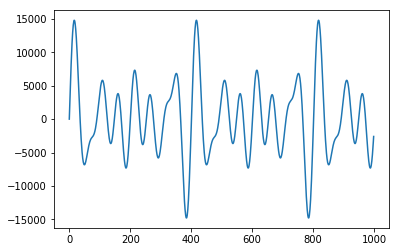

In [8]:
# Get rid of second channel while we're figuring out which frequencies to zero
plt.plot(AMajor[:1000])
plt.show()

## Generating 2 seconds A440
## y = A sin(440\. 2\. pi\. t)

In [9]:
time_d = 1./rate
print "time difference:", time_d

time difference: 2.26757369615e-05


In [10]:
steps = 2.0 / time_d
print "steps:", steps

steps: 88200.0


In [11]:
A = 15000 # Amplitude
A440 = np.array([A*np.sin(440.0*2.0*np.pi*t*time_d) for t in range(int(steps))], dtype='int16')

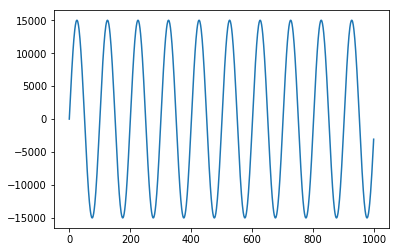

int16


In [12]:
plt.plot(A440[:1000])
plt.show()
print A440.dtype

## Save to file

In [13]:
# save to file
spwav.write("A440_new.wav", rate, A440)

## FFT

In [15]:
rate,AMajor = spwav.read("AMajor.wav")
time_step = 1./rate # time between samples
print "rate:",rate
print "time_step:",time_step
freq = spft.fftfreq(AMajor.size, d=time_step) # get the frequencies(just like the tutorial)
print freq.shape

rate: 44100
time_step: 2.26757369615e-05
(88200L,)


In [16]:
fft = spft.fft(AMajor)
print fft.shape
print fft.dtype

(88200L,)
complex128


/anaconda3/envs/py2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


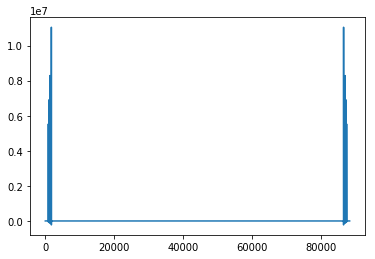

In [12]:
plt.plot(fft)

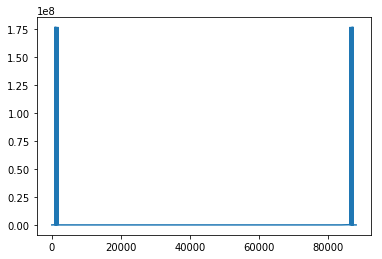

In [17]:
power = np.abs(fft)

plt.plot(power)

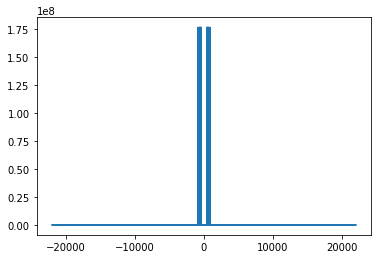

In [18]:
plt.plot(freq,power)

## Problem

Plot frequency from **-2000** to **2000**

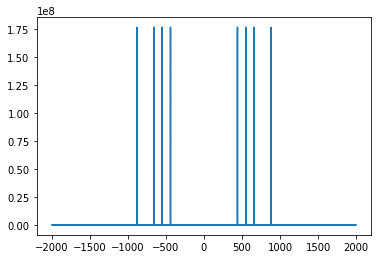

In [19]:
mask = np.logical_and(-2000<=freq, freq<= 2000)
plt.plot(freq[mask], power[mask])

## Problem

Find the frequency with the maximum power

In [33]:
print freq[np.argmax(power)]
max_power = power.argsort()[-8:][::-1]
print freq[max_power]

440.0
[-440.  440.  550. -550. -660.  660. -880.  880.]


In [23]:
mask = power>=10**8
print "maximum powers at", str([freq[mask]])

maximum powers at [array([ 440.,  550.,  660.,  880., -880., -660., -550., -440.])]


## Problem

Make all of the peaks except the first two maxima be zeros.

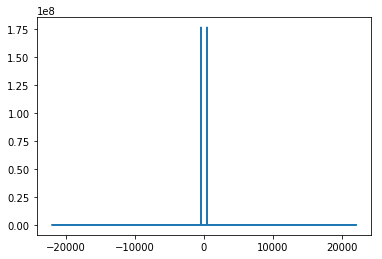

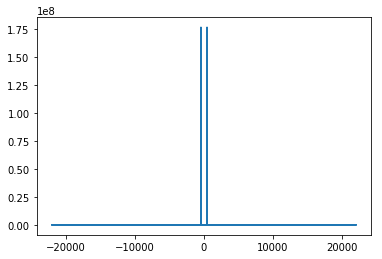

In [37]:
mask = np.logical_not(abs(freq) == 440)
po = power.copy()
po[mask] = 0
plt.plot(freq, po)

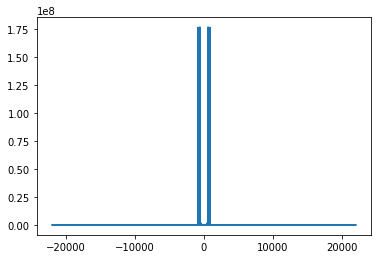

In [41]:
mask = np.logical_not(abs(freq) == 440)

plt.plot(freq[mask], power[mask])

## IFFT

In [20]:
new_audio = spft.ifft(fft)

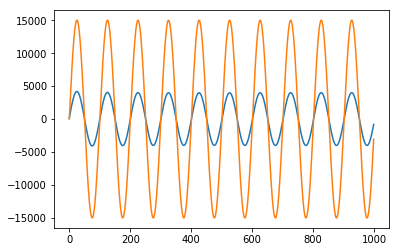

In [21]:
plt.plot(new_audio[:1000])
plt.plot(A440[:1000])

## Problem

Save to file!

## 2D FFT

http://www.scipy-lectures.org/intro/scipy.html#scipy-high-level-scientific-computing

(474L, 630L)


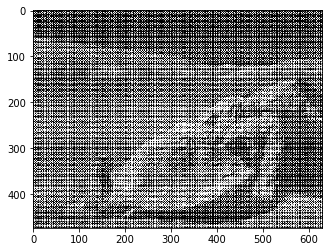

In [34]:
from matplotlib.pylab import imread

moon = imread('moonlanding.png')
print moon.shape
plt.imshow(moon, cmap='gray')
plt.show()

In [35]:
print moon

[[ 0.04705882  0.          0.23921569 ...,  0.          0.00392157
   0.53333336]
 [ 0.          0.          0.67843139 ...,  0.10196079  0.29019609  0.        ]
 [ 0.72156864  0.10980392  0.60392159 ...,  0.          0.21568628  1.        ]
 ..., 
 [ 0.00392157  0.          1.         ...,  1.          1.          0.95686275]
 [ 0.          0.          0.15686275 ...,  0.          0.          0.35294119]
 [ 1.          0.52156866  0.04705882 ...,  0.          0.          1.        ]]


Text(0.5,1,u'Fourier transform')

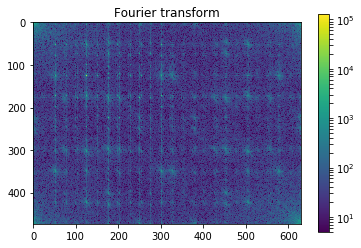

In [176]:
from scipy import fftpack
im_fft = fftpack.fft2(moon)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5,1,u'Filtered Spectrum')

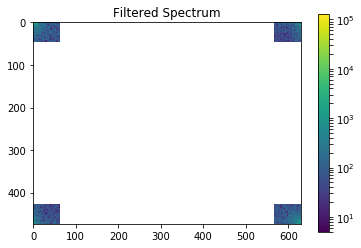

In [182]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5,1,u'Reconstructed Image')

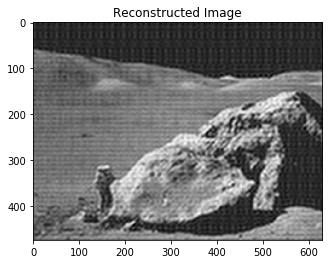

In [183]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')